# Default of Credit Card Clients Dataset

## Project Overview

The "Default of Credit Card Clients" dataset is designed to analyze credit card default payments in Taiwan. This dataset provides a rich collection of features related to credit card usage and demographic information, allowing for insights into the factors that contribute to defaulting on credit card payments.

## Type of Learning/Algorithm

This project primarily employs **supervised learning algorithms** to predict whether a client will default on their credit card payments. algorithms used in this type of analysis include:

- Logistic Regression
- Decision Trees


## Type of Task

The task associated with this dataset is a **binary classification** problem, where the goal is to classify clients into two categories:

- **Default**: Clients who defaulted on their credit card payments.
- **No Default**: Clients who did not default.

By using this dataset, one can build predictive models to identify at-risk clients and help financial institutions manage credit risk more effectively.

## Citation

UCI Machine Learning Repository. (n.d.). *Default of Credit Card Clients Dataset*. Retrieved from https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import os

In [31]:
# Set file paths and constants
DATASET_PATH = '../data/creditcard.csv'
TARGET_VARIABLE = 'default payment next month'  # Target variable name
FEATURES = ['ID',
 'LIMIT_BAL',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'SEX_2',
 'EDUCATION_1',
 'EDUCATION_2',
 'EDUCATION_3',
 'EDUCATION_4',
 'EDUCATION_5',
 'EDUCATION_6',
 'MARRIAGE_1',
 'MARRIAGE_2',
 'MARRIAGE_3']

In [32]:
# Load the dataset
data = pd.read_csv(DATASET_PATH)

## Data Overview

| **Attribute**             | **Description**                           |
|---------------------------|-------------------------------------------|
| **Number of Samples**     | 30,000                                    |
| **Number of Features**    | 24                                        |
| **Byte Size**             | Approximately 1.2 MB                      |
| **Data Type Summary**     | 23 Numeric, 1 Categorical                 |

## Feature Descriptions

The dataset contains 24 features, including key attributes that help in predicting credit card defaults:

| **Feature**              | **Type**         | **Description**                                                      |
|--------------------------|------------------|----------------------------------------------------------------------|
| **ID**                   | Numeric          | Unique identifier for each client.                                  |
| **LIMIT_BAL**            | Numeric          | Credit limit (in NT dollars).                                      |
| **SEX**                  | Categorical      | Gender of the client (1 = male, 2 = female).                      |
| **EDUCATION**            | Categorical      | Education level (1 = graduate school, 2 = university, etc.).      |
| **MARRIAGE**             | Categorical      | Marital status (1 = married, 2 = single, 3 = others).             |
| **AGE**                  | Numeric          | Age of the client.                                                |
| **PAY_0**                | Numeric          | Repayment status in September (1 = paid, 0 = default, etc.).     |
| **PAY_1 to PAY_6**      | Numeric          | Repayment status from August to March (1 = paid, 0 = default).   |
| **BILL_AMT1 to BILL_AMT6** | Numeric        | Bill statement amount from September to April.                    |
| **PAY_AMT1 to PAY_AMT6** | Numeric         | Amount paid from September to April.                               |
| **DEFAULT**              | Categorical      | Default payment (1 = default, 0 = no default).                   |

## Data Structure

- The dataset is in a **single-table form**, consisting of various features for each client, with no multiple data sources involved.


In [33]:
# Display the first few rows of the dataset
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [34]:
# remove the undescriptive column names
data.columns = data.iloc[0]

# Remove the first row (unnamed) and reset the index
data = data[1:].reset_index(drop=True)

data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [35]:
# Data Description
print(f"Dataset contains {data.shape[0]} instances and {data.shape[1]} features.")
print(f"Features: {data.columns.tolist()}")
print(f"Missing values: \n{data.isnull().sum()}")

Dataset contains 30000 instances and 25 features.
Features: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']
Missing values: 
0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2            

In [36]:
# Data Cleaning
# Check for duplicates and drop if any
data.drop_duplicates(inplace=True)

# Describe the dataset
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


### Dropping Duplicates:
We used data.drop_duplicates(inplace=True) to remove any duplicate rows in the dataset.

Reasoning: Removing duplicates is crucial for ensuring that the dataset does not have redundant information, which could skew results and affect the training of machine learning models. Duplicates can occur when the same customer appears more than once, which would unfairly impact the analysis.

### Descriptive Statistics:
We used data.describe() to get a summary of the dataset’s statistics.

Reasoning: This helps to understand the distribution of numerical features such as the mean, standard deviation, and range. It’s an essential step in the exploratory data analysis (EDA) phase, as it helps identify potential outliers, data entry errors, or unexpected distributions.

### Unique Value Counts for Columns:
We created a unique_counts DataFrame to store the unique value counts for each column.

Reasoning: Understanding the number of unique values in each column helps identify categorical features, potential data entry issues (e.g., typos in categorical values), or features with too many or too few unique categories. This can also guide decisions about feature engineering and dimensionality reduction.

In [37]:
# Add factor treatment for SEX, EDUCATION, MARRIAGE

def convert_to_dummies(df, column, drop_first=True):
    if column not in df:
        return df
    # Create dummy variables
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=drop_first)
    # Concatenate the new dummy variables to the original DataFrame
    df = pd.concat([df, dummies], axis=1)
    # Optionally, drop the original categorical column
    df = df.drop(column, axis=1)

    return df

data = convert_to_dummies(data, 'SEX', drop_first=True)
data = convert_to_dummies(data, 'EDUCATION', drop_first=True)
data = convert_to_dummies(data, 'MARRIAGE', drop_first=True)


### Factor Treatment for Categorical Features (SEX, EDUCATION, MARRIAGE):
We used the convert_to_dummies() function to convert the categorical columns (SEX, EDUCATION, and MARRIAGE) into dummy variables.

Reasoning: Converting categorical variables into dummy variables is a necessary step when preparing data for machine learning algorithms. Many algorithms require numerical inputs, so this process helps encode categorical data (such as gender, education level, and marital status) into binary format that can be used in the model. Dropping the first column (drop_first=True) helps avoid multicollinearity, as the first dummy variable is redundant once the others are created.

In [38]:
# List of column names
print('Number of columns are: ', len(list(data.columns)))
list(data.columns)

Number of columns are:  32


['ID',
 'LIMIT_BAL',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'SEX_2',
 'EDUCATION_1',
 'EDUCATION_2',
 'EDUCATION_3',
 'EDUCATION_4',
 'EDUCATION_5',
 'EDUCATION_6',
 'MARRIAGE_1',
 'MARRIAGE_2',
 'MARRIAGE_3']

In [39]:
# Cleaned Data Shape
print('The Data Shape is: ', data.shape)
data =  data.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
# Cleaned Data Types
print(data.dtypes)  # Check the data types of each column

The Data Shape is:  (30000, 32)
ID                            int64
LIMIT_BAL                     int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
SEX_2                         int64
EDUCATION_1                   int64
EDUCATION_2                   int64
EDUCATION_3                   int64
EDUCATION_4                   in

In [40]:
# Create a DataFrame to hold unique counts
unique_counts = pd.DataFrame()

# Loop through each column and get unique value counts
for column in data.columns:
    counts = data[column].value_counts()
    unique_counts[column] = [len(counts)]

# Fill NaN values with 0 for columns with different unique counts
unique_counts = unique_counts.fillna(0)

# Optionally, convert counts to integers
unique_counts = unique_counts.astype(int)

unique_counts

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,30000,81,56,11,11,11,11,10,10,22723,...,2,2,2,2,2,2,2,2,2,2


### Filling NaN Values for Unique Counts:
We filled any NaN values in the unique_counts DataFrame with 0.

Reasoning: It's important to ensure that missing or undefined data is handled properly. In this case, filling NaN values with 0 helps ensure that you can count the unique values in each column without errors.

0    23364
1     6636
Name: default payment next month, dtype: int64


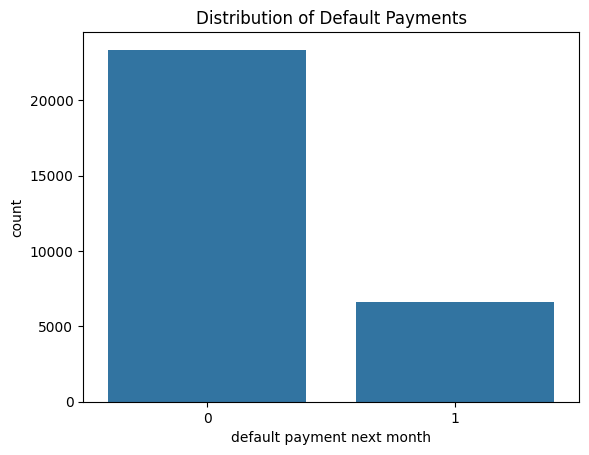

In [61]:
# Exploratory Data Analysis (EDA)
print(data[TARGET_VARIABLE].value_counts())

# Visualize the distribution of the target variable
sns.countplot(x=TARGET_VARIABLE, data=data)
plt.title('Distribution of Default Payments')
plt.show()

We see a strong imbalance of positive and negative samples with 23364 negative and 6636 positive samples.

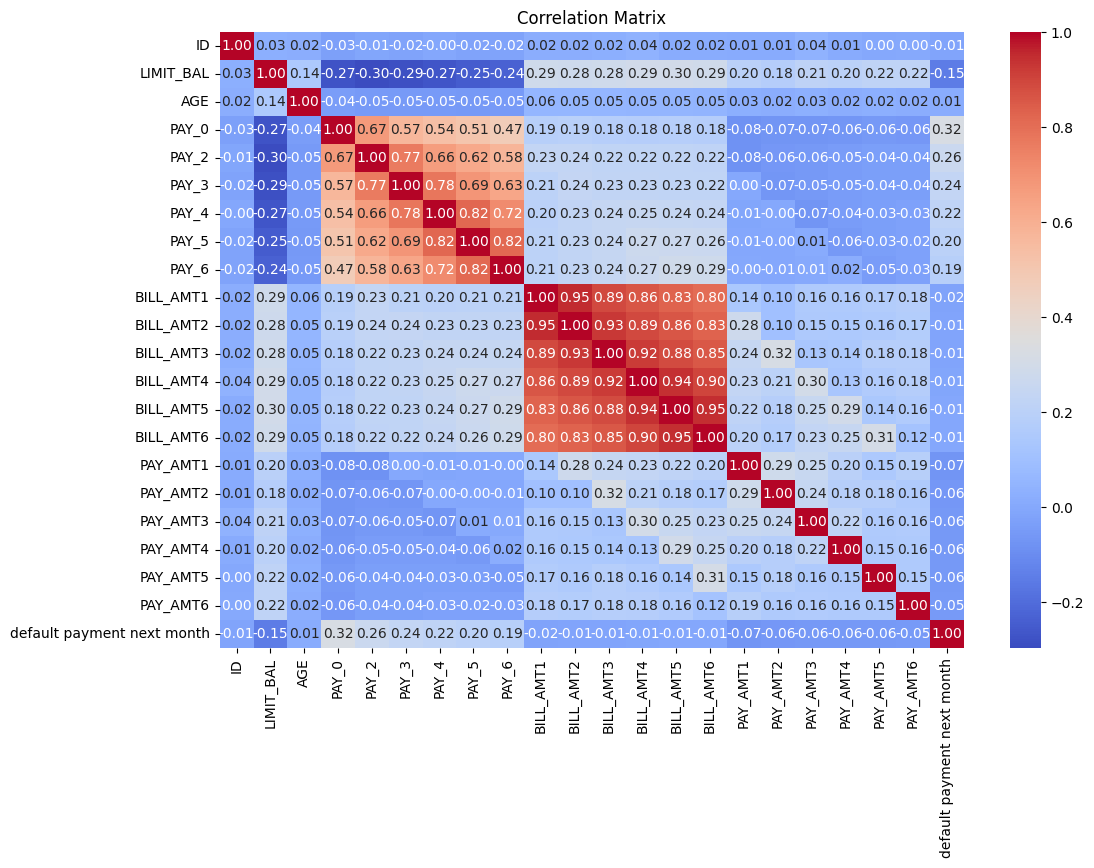

In [42]:
# Visualize correlations using a heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.iloc[:, 0:22].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## correlation matrix analysis

Strong Positive Correlations:

1. Sequential Payment History (PAY_0 through PAY_6):
    - Shows strong positive correlations (0.6-0.8) between consecutive months
    - The correlation weakens as months get further apart
2. Bill Amounts (BILL_AMT1 through BILL_AMT6):
    - Very strong positive correlations (0.8-0.95)
    - Particularly strong between consecutive months
    - Suggests consistent billing patterns
3. Pay Amounts (PAY_AMT1 through PAY_AMT6):
    - Moderate positive correlations (0.15-0.31)
    - Weaker than bill amount correlations
    - Suggests more variability in payment behavior

Notable Patterns:

1. LIMIT_BAL (Credit Limit):
    - Moderate positive correlation with bill amounts (0.28-0.30)
    - Weak positive correlation with payment amounts (0.18-0.22)
    - Makes sense as higher credit limits allow for higher bills
2. Default Next Month (Target Variable):
    - Positive correlation with payment status variables (PAY_0 through PAY_6) around 0.2-0.32
    - Very weak or slightly negative correlations with bill and payment amounts
    - Suggests payment status history is more predictive of default than absolute amounts
Suggests payment status history is more predictive of default than absolute amounts

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test, y_pred, model_name=''):
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Draw the heatmap for the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted No Default', 'Predicted Default'],
                yticklabels=['Actual No Default', 'Actual Default'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual')

    # Calculate additional metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print accuracy and other stats
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

In [44]:
# Prepare the data for modeling
X = data[FEATURES]
y = data[TARGET_VARIABLE]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Shapes of the resulting datasets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Shapes of the resulting datasets:
X_train shape: (21000, 31)
X_test shape: (9000, 31)
y_train shape: (21000,)
y_test shape: (9000,)


In [45]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Fit the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
# Make predictions
y_pred = model.predict(X_test_scaled)

Accuracy: 0.73
Precision: 0.38
Recall: 0.41
F1 Score: 0.40


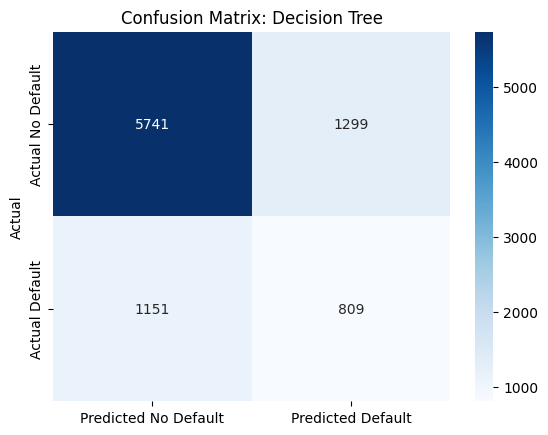

In [48]:
# Evaluate
evaluate_model(y_test, y_pred, model_name='Decision Tree')

### Decision Tree Performance on Credit Card Default Prediction

The Decision Tree's performance in predicting credit card defaults is as follows:

- **Accuracy: 0.73**  
  The model correctly classified 73% of the cases. This seems good, but it might not tell the full story if the data is imbalanced.

- **Precision: 0.38**  
  The precision is low at 38%. This means that when the model predicts a customer will default, only 38% of those predictions are correct. This can lead to many wrong predictions about customers who are actually safe.

- **Recall: 0.41**  
  The recall is also low at 41%. This shows that the model only identifies 41% of the actual defaulting customers. Many customers who will default are missed.

- **F1 Score: 0.40**  
  The F1 score is 0.40. This number combines precision and recall. It shows that the model has trouble making reliable predictions about defaults.


# Fit a Logistic Regression Model

In [49]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Fit the logistic regression model using statsmodels
log_reg_sm = sm.Logit(y_train, X_train).fit()

# Print the summary
print(log_reg_sm.summary())

# Extract significant parameters
significant_params = log_reg_sm.pvalues[log_reg_sm.pvalues < 0.05]
print("\nSignificant Parameters:")
print(significant_params)

Optimization terminated successfully.
         Current function value: 0.464622
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default payment next month   No. Observations:                21000
Model:                                  Logit   Df Residuals:                    20969
Method:                                   MLE   Df Model:                           30
Date:                        Wed, 06 Nov 2024   Pseudo R-squ.:                  0.1238
Time:                                09:13:38   Log-Likelihood:                -9757.1
converged:                               True   LL-Null:                       -11136.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ID          -1.363e-06   2.09e-06     -0.6

We see that some of the payment and bill amounts are significant predictors of default.
More importantly, we see that our designed factors for education and sex (but not marital status) are significant in predicting default.

Accuracy: 0.81
Precision: 0.68
Recall: 0.24
F1 Score: 0.35


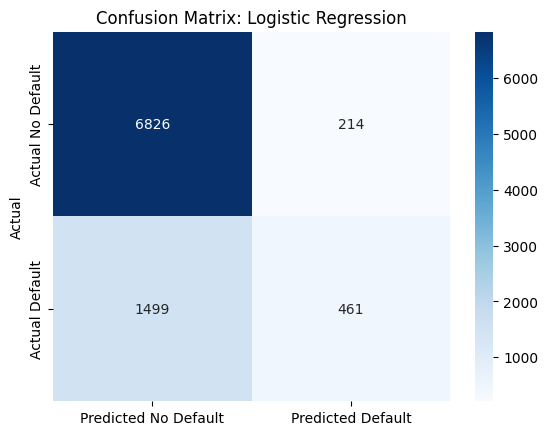

In [50]:
y_pred = ( log_reg_sm.predict(X_test) > 0.5 ).astype(int)

# Evaluate
evaluate_model(y_test, y_pred, model_name='Logistic Regression')

## Fit on Balanced Dataset Using Undersampling to address skew

In [51]:
from sklearn.utils import resample

def get_balanced_dataset(data, features, target_variable, test_size=0.3, random_state=42):
    """
    Balances the dataset by undersampling the majority class and splits into training and testing sets.

    Parameters:
    - data: DataFrame containing features and target variable.
    - features: List of column names for the features.
    - target_variable: The name of the target variable column.
    - test_size: Proportion of the dataset to include in the test split.
    - random_state: Controls randomness for reproducibility.

    Returns:
    - X_train: Features for the training set.
    - X_test: Features for the testing set.
    - y_train: Target variable for the training set.
    - y_test: Target variable for the testing set.
    """

    # Prepare the data for modeling
    X = data[features]
    y = data[target_variable]

    # Combine X and y for easier manipulation
    df = pd.concat([X, y], axis=1)

    # Separate the majority and minority classes
    majority = df[df[target_variable] == 0]
    minority = df[df[target_variable] == 1]

    # Undersample the majority class
    majority_undersampled = resample(majority, 
                                      replace=False,    # sample without replacement
                                      n_samples=len(minority),  # to match minority class
                                      random_state=random_state)  # reproducible results

    # Combine the undersampled majority class with the minority class
    balanced_df = pd.concat([majority_undersampled, minority])

    # Split back into X and y
    X_balanced = balanced_df[features]
    y_balanced = balanced_df[target_variable]

    # Split the balanced dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

X_train_bal, X_test_bal, y_train_bal, y_test_bal = get_balanced_dataset(data, FEATURES, TARGET_VARIABLE)

# Print the shapes of the resulting balanced datasets
print("Shapes of the resulting balanced datasets:")
print(f"X_train_bal shape: {X_train_bal.shape}")
print(f"X_test_bal shape: {X_test_bal.shape}")
print(f"y_train_bal shape: {y_train_bal.shape}")
print(f"y_test_bal shape: {y_test_bal.shape}")

Shapes of the resulting balanced datasets:
X_train_bal shape: (9290, 31)
X_test_bal shape: (3982, 31)
y_train_bal shape: (9290,)
y_test_bal shape: (3982,)


Optimization terminated successfully.
         Current function value: 0.610221
         Iterations 7
Accuracy: 0.66
Precision: 0.66
Recall: 0.64
F1 Score: 0.65


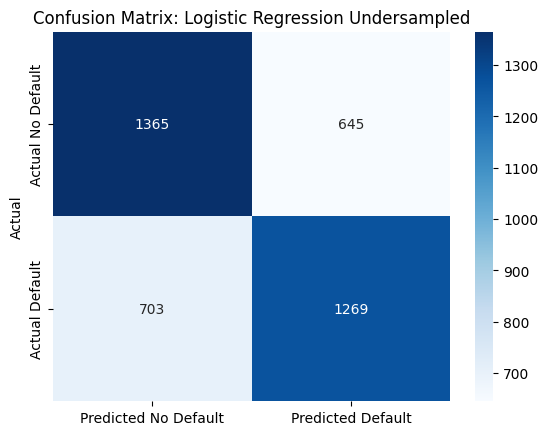

In [55]:
log_reg_sm = sm.Logit(y_train_bal, X_train_bal).fit()

y_pred_bal = ( log_reg_sm.predict(X_test_bal) > 0.5 ).astype(int)

# Evaluate
evaluate_model(y_test_bal, y_pred_bal, model_name='Logistic Regression Undersampled')

Accuracy: 0.68
Precision: 0.37
Recall: 0.66
F1 Score: 0.47


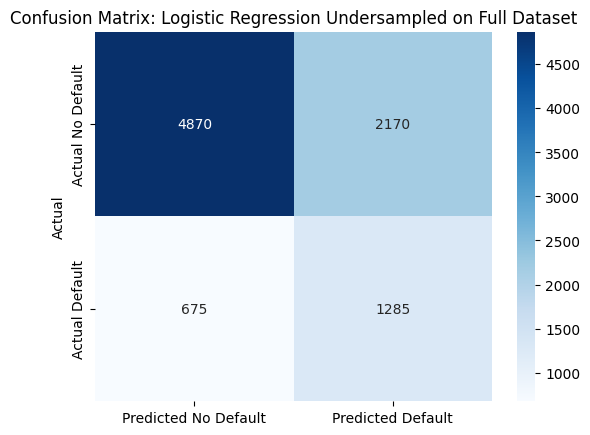

In [56]:
y_pred = ( log_reg_sm.predict(X_test) > 0.5 ).astype(int)

# Evaluate
evaluate_model(y_test, y_pred, model_name='Logistic Regression Undersampled on Full Dataset')

# Performance Analysis:

1. Logistic Regression Undersampled Model:

- Most balanced performance across metrics (0.64-0.66 range)
- F1 score of 0.65 suggests decent overall performance
- Balanced precision and recall indicates good trade-off between false positives and negatives
- Shows undersampling helped address class imbalance

2. Logistic Regression Model:

- Highest accuracy (0.81) but misleading due to class imbalance
- High precision (0.68) but very low recall (0.24)
- Poor F1 score (0.35) reveals model's limitations
- Model is likely biased toward predicting non-defaults

3. Decision Tree Model:

- Moderate accuracy (0.73)
- Lower but more balanced precision (0.38) and recall (0.41)
- F1 score (0.40) indicates room for improvement
- More balanced predictions but less accurate overall

Key Takeaways & Improvements:

1. Class Imbalance Impact:

- Undersampling proved effective in balancing model performance
- Consider trying other sampling techniques:
    - SMOTE (Synthetic Minority Over-sampling Technique)
    - Combination of over/under sampling
    - Weighted classes in model training

2. Feature Engineering Opportunities:

- Create interaction terms between correlated features
- Develop new features from payment patterns


In [53]:
# Save the model if needed (optional)
import joblib
joblib.dump(model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

# Conclusion

In this project, we performed basic data cleaning, and added features representing factor-based treatments.

We fitted multiple models:

    1. Logistic Regression with undersampling
    2. Logistic Regression on full dataset
    3. Decision Tree on full dataset

We observe that on the full dataset, the fitted models have low recall.

This is problematic because it means that if someone will default, the model will only predict this correctly about 35 % of the time.

In the context of lending, it is better financially to have a false positive instance than a false negative instance of predicting default.

This is where the undersampling is beneficial. When the model is trained on equal positive and negative examples, we observe a significant improvement in recall (35% to 66%).

Further work should be directed towards applying complex models (neural networks) and possibly collecting more positive samples to address skew problem leading to low recall.